# MAGNETIZATION VECTOR FIELD RECONSTRUCTION: Heterostructure

## Notebook Documentation

<br>
<br>
<img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
Magnetization Vector Field Reconstruction Notebook Documentation is licensed under the Creative Commons Attribution 4.0 International License (2018).
To view a copy of this license, visit http://creativecommons.org/licenses/by/4.0/.

Documentation Authors:
- Marc Rosanes
- Doga Gursoy
- Aurelio Hierro


# Testing the 3D vector field reconstruction algorithm 
## From projections taken at two tilt angles for two different dichroisms, towards the reconstructed vector fill object


In this notebook we are reconstructing the magnetization vector field thanks to four projection datasets. Two of them for a given tilt axis, using positive and then negative dichroism respectively. The other two for data recorded using an orthogonal tilt axis to the first one, and also using positive and then negative dichroism respectively.

In order to reconstruct the magnetization vector, the input projection data must be the logarithm of the transmittance. Thus, each set of the heterostructure projections represents the logarithm of the transmittance. 


### Testing the 3D vector field reconstruction algorithm


First, let's make the necessary imports

In [32]:
import dxchange
import tomopy
import numpy as np
import matplotlib.pyplot as plt
import time

...let us load the our input data: the four datasets containing the projections at two different tilt axes and taken at two different dichroisms for each tilt axis. The tilt angles are also loaded.


In [111]:
xnfile = 'Xt_dNeg_m90-901deg_Tomo.hdf5'
xpfile = 'Xt_dPos_m90-901deg_Tomo.hdf5'
ynfile = 'Yt_dNeg_m90-901deg_Tomo.hdf5'
ypfile = 'Yt_dPos_m90-901deg_Tomo.hdf5'
tilts_file = 'FP_m90-90_1deg.txt'

xn = dxchange.read_hdf5(xnfile, dataset='/Tomo/data').astype('float32')
xp = dxchange.read_hdf5(xpfile, dataset='/Tomo/data').astype('float32')
yn = dxchange.read_hdf5(ynfile, dataset='/Tomo/data').astype('float32')
yp = dxchange.read_hdf5(ypfile, dataset='/Tomo/data').astype('float32')


We take the differenced of the logarithms of the transmittance, for projections with a same tilt axis and different dichroism. This is a preprocessing needed if we want to be able to extract the magnetization vector field. 

The Y projections need to be transposed; tomopy requires as input all the projections given with the axes in the same direction.


In [110]:
prj1 = xp-xn
prj2 = yp-yn

for m in range(prj2.shape[0]):
	prj2[m] = np.transpose(prj2[m]).copy()
    
prj1 = tomopy.downsample(prj1, level=2, axis=2).copy()
prj1 = tomopy.downsample(prj1, level=2, axis=1).copy()
prj2 = tomopy.downsample(prj2, level=2, axis=2).copy()
prj2 = tomopy.downsample(prj2, level=2, axis=1).copy()

print(np.shape(prj1))
print(np.shape(prj2))

(181, 64, 64)
(181, 64, 64)


Check the inputs, to see that the given input datasets are correctly loaded.

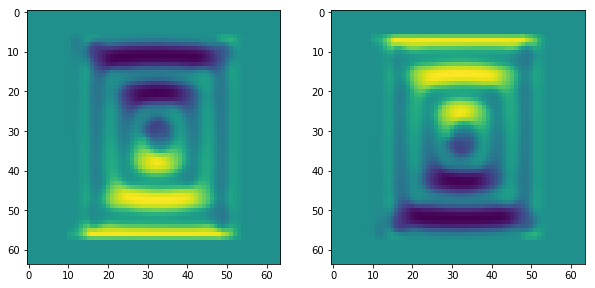

In [34]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(prj1[50,:,:])
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(prj2[50,:,:])


...we load the tilt angles, we add to them an offset of 90 degrees and we convert to radians:

In [35]:
ang = np.loadtxt(tilts_file)
ang = np.pi/180. * ang
ang = -np.array(np.pi/2.+ang, dtype='float32')

## Reconstruction

Reconstruct the vector magnetization field components (actually it is the quantity $2L^{-1}\delta\vec{m}$, the one which is reconstructed), taking as input the projections.  

In [104]:
t = time.time()
rec1, rec2, rec3 = tomopy.vector2(prj1, prj2, ang, ang, axis1=1, axis2=2, num_iter=100)
dxchange.write_tiff(rec1)
dxchange.write_tiff(rec2)
dxchange.write_tiff(rec3)
print (time.time()-t)
print(np.shape(rec1))
print(np.shape(rec2))
print(np.shape(rec3))

300.147086143
(64, 64, 64)
(64, 64, 64)
(64, 64, 64)


# Visualization of the test results

In this section, there are presented the results of the magnetization vector field components obtained thanks to the tomopy vector reconstruction. The magnetization vector components are presented for different depths inside the object. 

## Results visualization: magnetization vector field components

Visualization of the three magnetization vector field components for a certain object reconstruction depth.

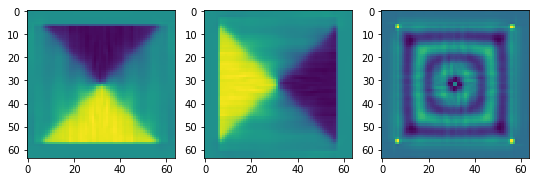

In [105]:
fig = plt.figure(figsize=(9, 7))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(rec1[28,:,:])
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(rec2[28,:,:])
ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(rec3[28,:,:])

## Results visualization: magnetization vector field components

Visualization of the three magnetization vector field components for another second object reconstruction depth.


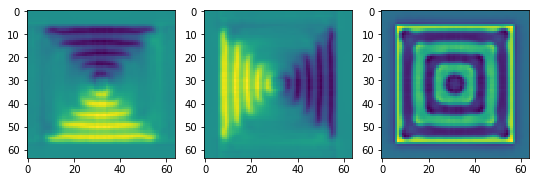

In [106]:
fig = plt.figure(figsize=(9, 7))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(rec1[34,:,:])
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(rec2[34,:,:])
ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(rec3[34,:,:])

## Results visualization: magnetization vector field components

Visualization of the three magnetization vector field components for another third object reconstruction depth.


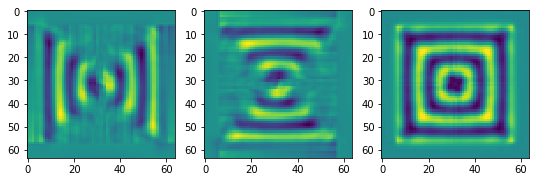

In [108]:
fig = plt.figure(figsize=(9, 7))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(rec1[30,:,:])
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(rec2[30,:,:])
ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(rec3[30,:,:])